In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
def photovlight(E, Pmax, Ek, R):
    return Pmax * np.tanh(E / Ek) - R

In [3]:
E = np.array([440,250,135.8,0.4])
P = np.array([1.24e-2, 9.86e-3, 5.43e-3, -2.46e-3])

In [4]:
Epopt, Epcov = curve_fit(photovlight, E, P, p0=(0,200,0))

In [5]:
Epopt, Epcov

(array([1.57554429e-02, 2.40852565e+02, 2.51192402e-03]),
 array([[ 8.68078887e-08,  1.52278993e-03,  2.34563486e-08],
        [ 1.52278993e-03,  8.64734381e+01, -5.74972847e-04],
        [ 2.34563486e-08, -5.74972847e-04,  3.03151641e-08]]))

In [6]:
pred_P = photovlight(E, *Epopt)
error = (pred_P - P) ** 2
pred_P, error, np.sum(error)

(array([ 0.01244813,  0.00973146,  0.00553618, -0.00248576]),
 array([2.31620121e-09, 1.65236375e-08, 1.12731949e-08, 6.63470813e-10]),
 3.0776504474521184e-08)

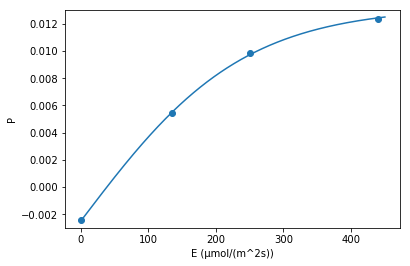

In [19]:
E_plot = np.linspace(-0.2, 450., 1000)
P_plot = photovlight(E_plot, *Epopt)

plt.scatter(E,P)
plt.plot(E_plot, P_plot)
plt.ylim((-3e-3, 1.3e-2))
plt.xlabel('E (μmol/(m^2s))')
plt.ylabel('P')
plt.show()

In [8]:
G = [0.001431398231, 
     0.001324916993,
     0.0002226796472,
     0.000214260976]

In [9]:
def calvivphoto(E, Gmax, Ek, D):
    return Gmax * np.tanh(E/Ek) - D

In [10]:
Gpopt, pcov = curve_fit(calvivphoto, E, G, p0=(0,200,0))

In [11]:
Gpopt

array([ 2.01640615e-03,  5.05582521e+02, -8.12819377e-05])

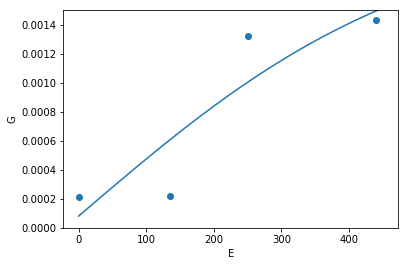

In [16]:
E_plot = np.linspace(-0.2, 450., 1000)
G_plot = calvivphoto(E_plot, *Gpopt)

plt.scatter(E,G)
plt.plot(E_plot, G_plot)
plt.ylim((0, 0.0015))
plt.xlabel('E')
plt.ylabel('G')
plt.show()

In [14]:
pred_G = photovlight(E, *Gpopt)
error = (pred_G - G) ** 2
pred_G, error, np.sum(error)

(array([1.49582718e-03, 1.00432051e-03, 6.10230918e-04, 8.28772505e-05]),
 array([4.15108911e-09, 1.02782105e-07, 1.50195987e-07, 1.72616833e-08]),
 2.7439086437679776e-07)

# Q 4

In [54]:
S = 1353
phi = 20 * (2 * np.pi / 360)
delta = 23.44 * np.cos((172 - 71) * 2 * np.pi / 365) * (2 * np.pi / 360)
alpha = 0.07
lmbda = 0.12
h = 0.5
e = 1783
cover = 0.3

def max0(x):
    return (x > 0) * x 

def Q(cosz):
    return max0(S * cosz ** 2 / ((cosz + 2.7)*e*10**-5+1.085*cosz+0.1))

def cosz(HA):
    return np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.cos(HA)

def HA(t):
    return (12 - t) * np.pi / 12.

def Es(Q):
    return 2.1 * Q

def Eb(Es):
    return Es * (1 - alpha) * np.exp(-lmbda * h)

# Eb input by t (time)
def Eb_a(t):
    HA_t = HA(t)
    cosz_t = cosz(HA_t)
    Q_t = Q(cosz_t)
    Es_t = Es(Q_t)
    return Eb(Es_t)

In [90]:
T_plot = np.linspace(0, 24, 1000)
Eb_plot = Eb_a(T_plot)

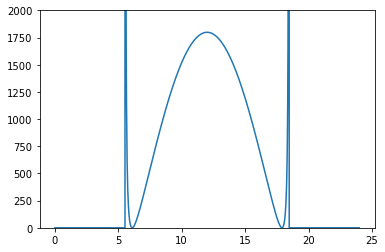

In [91]:
plt.ylim((0, 2000))
plt.plot(T_plot, Eb_plot)

In [92]:
import scipy.integrate as integrate

In [93]:
integrate.simps

<function scipy.integrate.quadrature.simps>

In [94]:
def G4(t):
    return calvivphoto(Eb_a(t), *Gpopt)

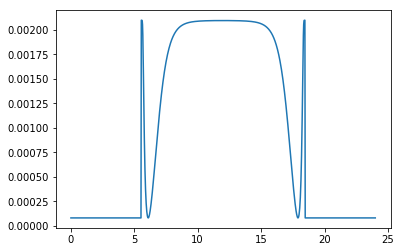

In [95]:
G4_plot = G4(T_plot)
plt.plot(T_plot, G4_plot)

In [96]:
integrate.simps(G4_plot, T_plot) * cover

0.006833927686828194